In [1]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
import cmath

In [2]:
def Diag(w, logx=False, **kwargs):
    # fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5), layout='constrained')

    if (logx):
        ax.semilogx(w.real, w.imag, c='b')
    else:
        ax.plot(w.real, w.imag, c='b')
    # ax.scatter(x=w.real, y=w.imag)
    # ax.set_ylabel('Амплитуда, дБ', color='b')
    # ax.set_xlabel('Частота, рад/с')
    ax.grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'xlimits' in kwargs.keys():
        ax.set_xlim(kwargs['xlimits'])

    if 'ylimits' in kwargs.keys():
        ax.set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            ax.axvline(x=xvline, color='black', linestyle='solid', linewidth=1)
    if 'xhlines' in kwargs.keys():
        for xhline in kwargs['xhlines']:
            ax.axhline(y=xhline, color='black', linestyle='solid', linewidth=1)

    if 'points' in kwargs.keys():
        for point in kwargs['points']:
            ax.scatter(x=point[0], y=point[1], s=20, c='black')
    
    plt.show()

#### Критерий Михайлова

In [3]:
# Расчет критерия Михайлова
# p - комплексная частота
def fz(p):
    c = []
    for i in p:
        c.append(0.72*i**3+1.7*i**2+i+1.4)
    return c

In [4]:
# Расчет критерия Михайлова
# w - частота
def fzj(w):
    c = []
    for i in w:
        real = -1.7*i**2+1.4
        imag = -0.72*i**3+i
        c.append(complex(real=real, imag=imag))
    return c

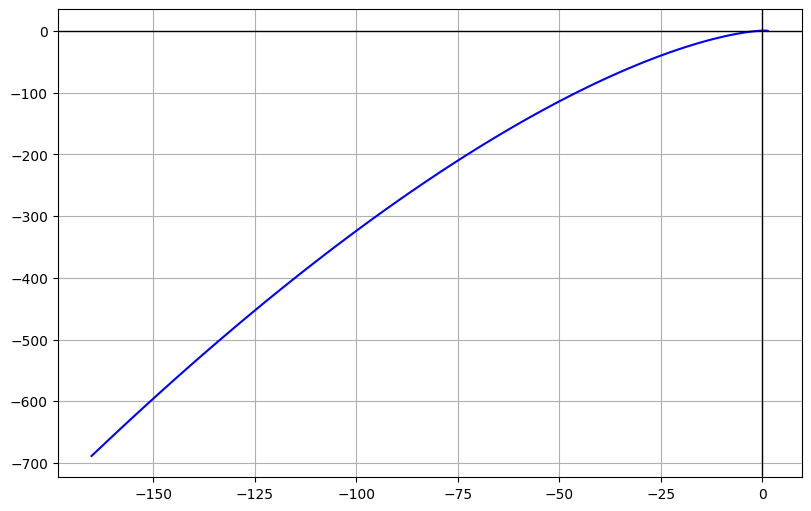

In [5]:
w = np.arange(start=0, stop=10, step=0.1, dtype=float)
wc = [complex(0, x) for x in w]
r = np.array(fz(wc))
Diag(w=r, xvlines=[.0], xhlines=[.0])

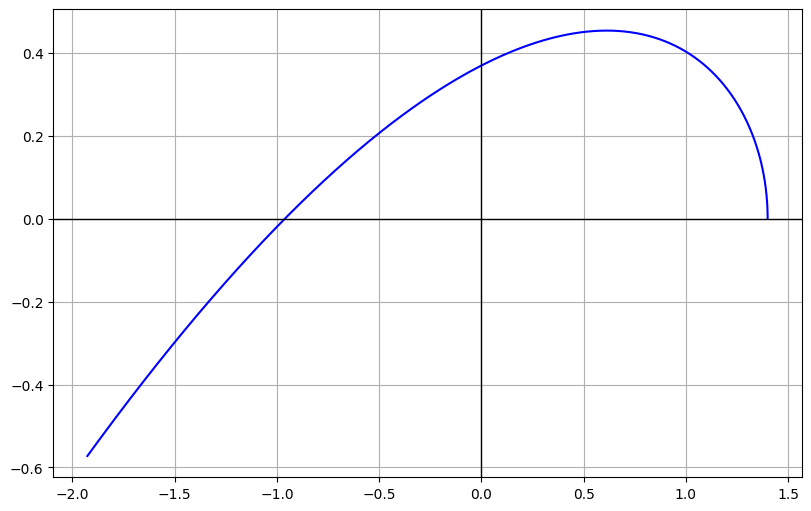

In [6]:
w = np.arange(start=0, stop=1.4, step=0.001, dtype=float)
wc = [complex(0, x) for x in w]
r = np.array(fz(wc))
Diag(w=r, xvlines=[.0], xhlines=[.0])

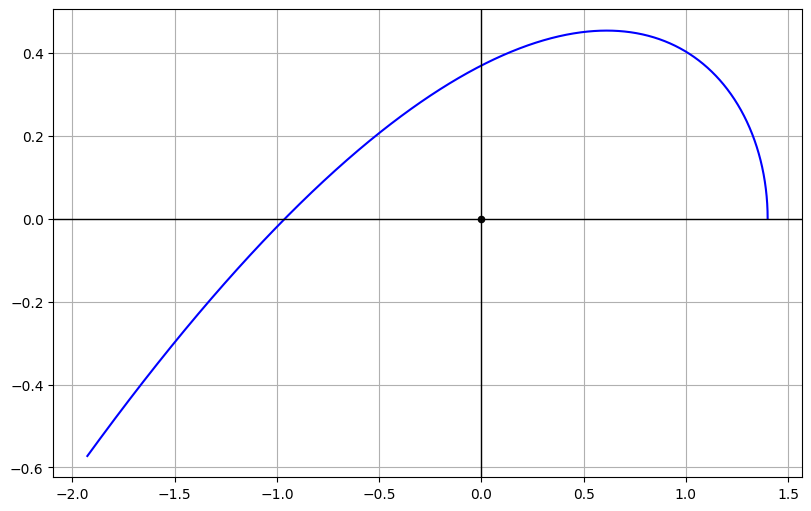

In [7]:
w = np.arange(start=0, stop=1.4, step=0.001, dtype=float)
# wc = [complex(0, x) for x in w]
r = np.array(fzj(w))
# r[3]
Diag(w=r, xvlines=[.0], xhlines=[.0], points=[(0, 0)])

#### Критерий Найквиста

In [8]:
# Расчет критерия Найквиста
# p - комплексная частота
def fr(p):
    c = []
    for i in p:
        if (0.72*i**3+1.7*i**2+i != 0):
            c.append(1.4/(0.72*i**3+1.7*i**2+i))
    return c

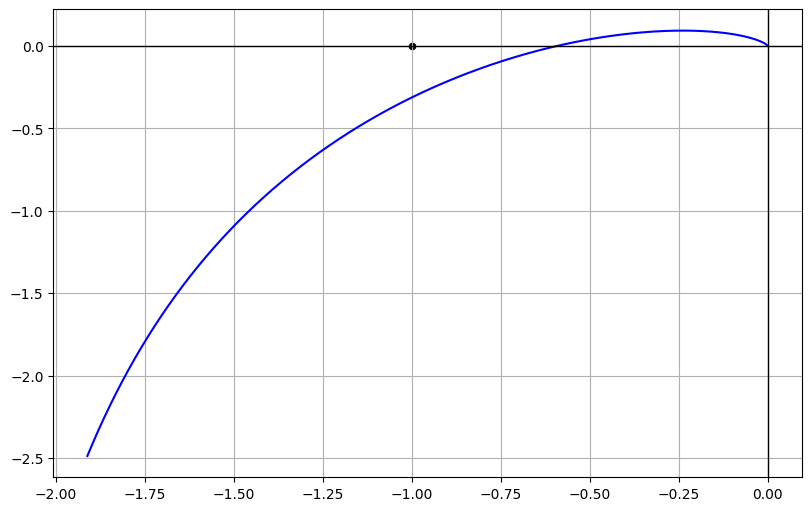

In [9]:
w = np.arange(start=0.4, stop=10, step=0.001, dtype=float)
wc = [complex(0, x) for x in w]
r = np.array(fr(wc))
# r[0]
Diag(w=r, xvlines=[.0], xhlines=[.0], points=[(-1,0)])

In [10]:
# Расчет критерия Найквиста
# w - частота
def frj(w):
    c = []
    for i in w:
        if ((-1.7*i**2)**2+(i-0.72*i**3)**2 != 0):
            real = (1.4*(-1.7)*i**2)/((-1.7*i**2)**2+(i-0.72*i**3)**2)
            imag = (-1.4*(i-0.72*i**3))/((-1.7*i**2)**2+(i-0.72*i**3)**2)
            c.append(complex(real, imag))
    return c

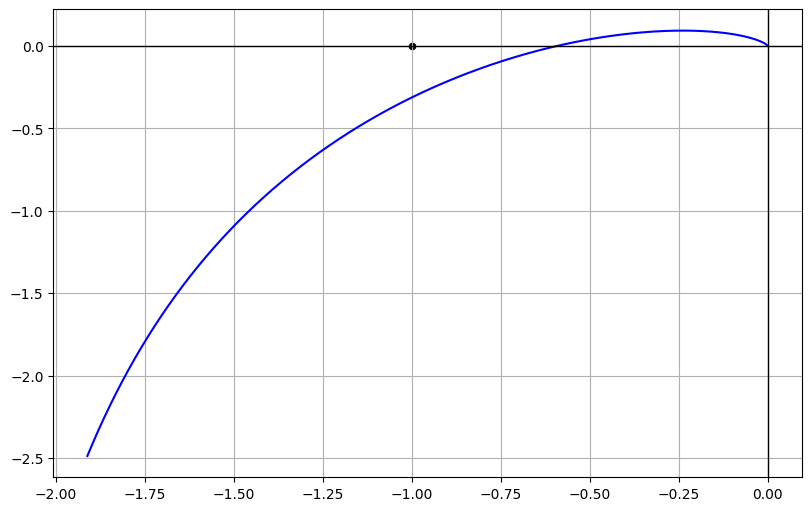

In [11]:
w = np.arange(start=0.4, stop=10, step=0.001, dtype=float)
# wc = [complex(0, x) for x in w]
r = np.array(frj(w))
# r[0]
Diag(w=r, xvlines=[.0], xhlines=[.0], points=[(-1,0)])

#### Переходная характеристика

Результаты расчета: 


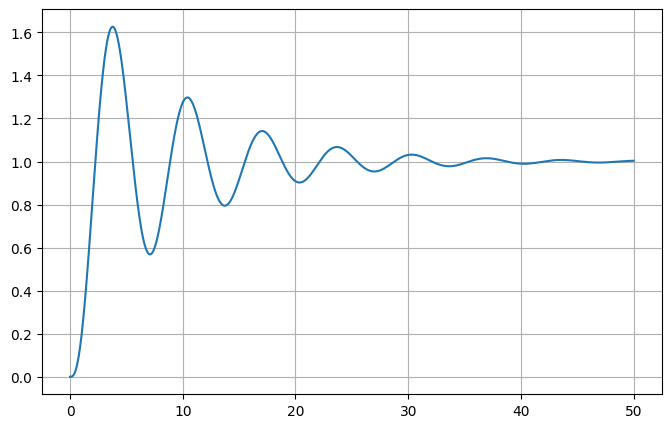

In [12]:
b = [1.4]
a = [0.72, 1.7, 1, 1.4]

tp = np.arange(start=0, stop=50.001, step=0.001)

t, y = sp.step((b, a), T=tp)
# t, y = sp.step((b, a), N=30)


print('Результаты расчета: ')
# print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.plot(t, y)
# ax.stem(*y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

##### Максимальное значение производной

In [13]:
diff = []
for i in range(len(t)-2):
    diff.append((y[i+1]-y[i])/(t[i+1]-t[i]))

In [14]:
max(diff)

0.7346588845058265

#### Корни характеристического уравнения замкнутой системы

In [15]:
b = [1.4]
a = [0.72, 1.7, 1, 1.4]

z, p, k = sp.tf2zpk(b=b, a=a)

print(f'Нули системы: {z}')
print(f'Полюса системы: {np.round(p, 3)}')
print(f'Коэффициент усиления системы: {k}')

Нули системы: []
Полюса системы: [-2.137+0.j    -0.112+0.947j -0.112-0.947j]
Коэффициент усиления системы: 1.9444444444444444


#### График RC-цепочки

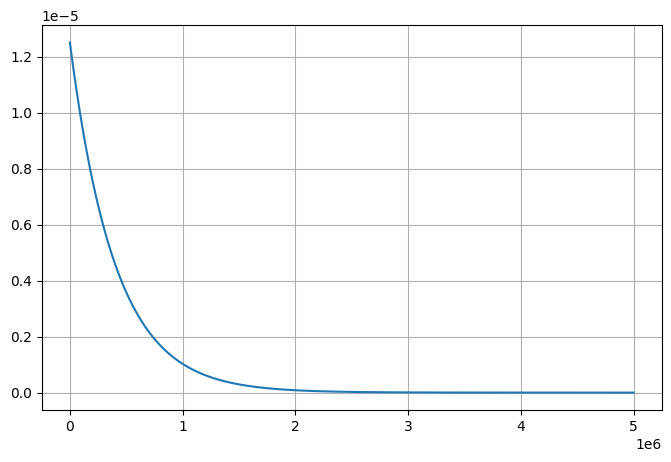

In [16]:
def f(x):
    return 125e-7*np.exp(-(25e-7)*x)
    # return 0.0000125*np.exp(-0.0000025*x)
    # return np.exp(-0.0000025*x)

x = np.arange(start=0, stop=5e6, step=10)

fg, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, f(x))
ax.grid()
plt.show()